# Loan Approval Prediction | Data Science Project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('Dataset.csv')

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## EDA-Explore the Data

In [9]:
df.shape

(614, 13)

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Checking the outliers

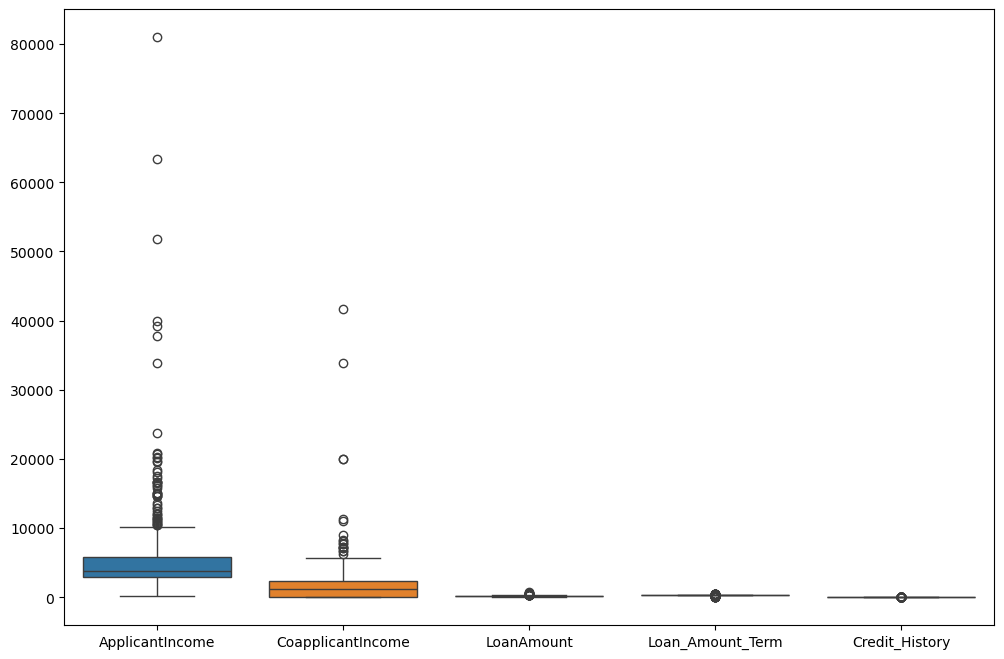

In [14]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = df)
plt.show()

### Fill the null values of numerical data type

In [16]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

### Fill the null values of object data type

In [18]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Visualisation and Comparison

Number of people who took Loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


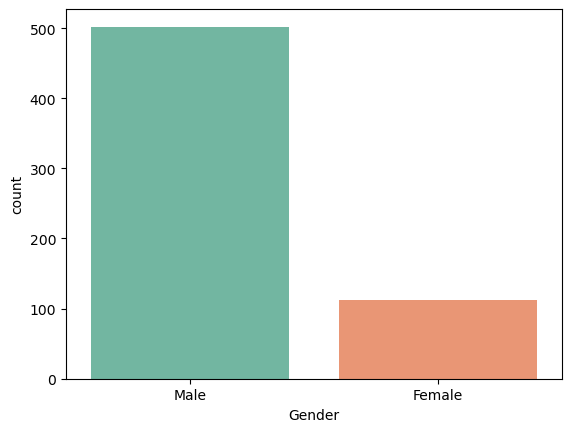

In [21]:
print('Number of people who took Loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender', data = df, palette= 'Set2' )
plt.show()

Number of people who took Loan by Married 
Married
Yes    401
No     213
Name: count, dtype: int64


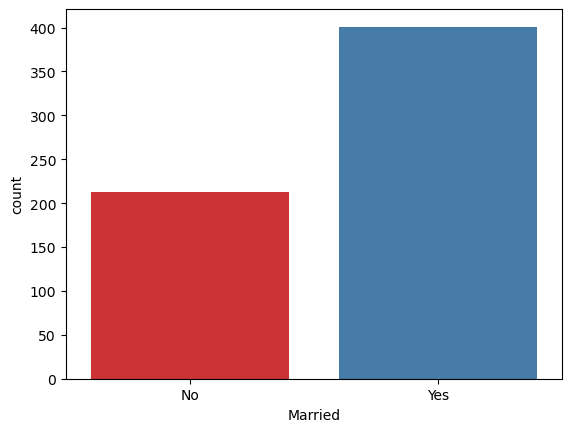

In [22]:
print('Number of people who took Loan by Married ')
print(df['Married'].value_counts())
sns.countplot(x = 'Married', data = df, palette= 'Set1' )
plt.show()

Number of people who took Loan by Education 
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


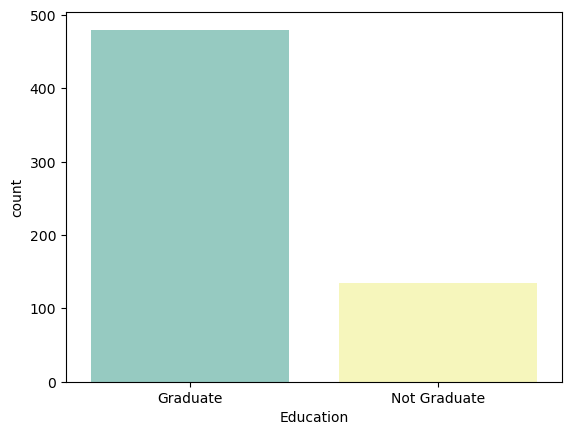

In [23]:
print('Number of people who took Loan by Education ')
print(df['Education'].value_counts())
sns.countplot(x = 'Education', data = df, palette= 'Set3' )
plt.show()

Number of people who took Loan by Dependents
Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64


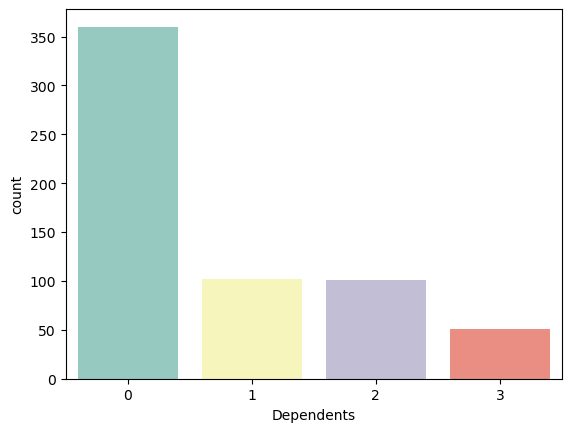

In [193]:
print('Number of people who took Loan by Dependents')
print(df['Dependents'].value_counts())
sns.countplot(x = 'Dependents', data = df, palette= 'Set3' )
plt.show()

In [24]:
df['Loan_ID'].value_counts()

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [25]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = numeric_df.corr()
corr


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


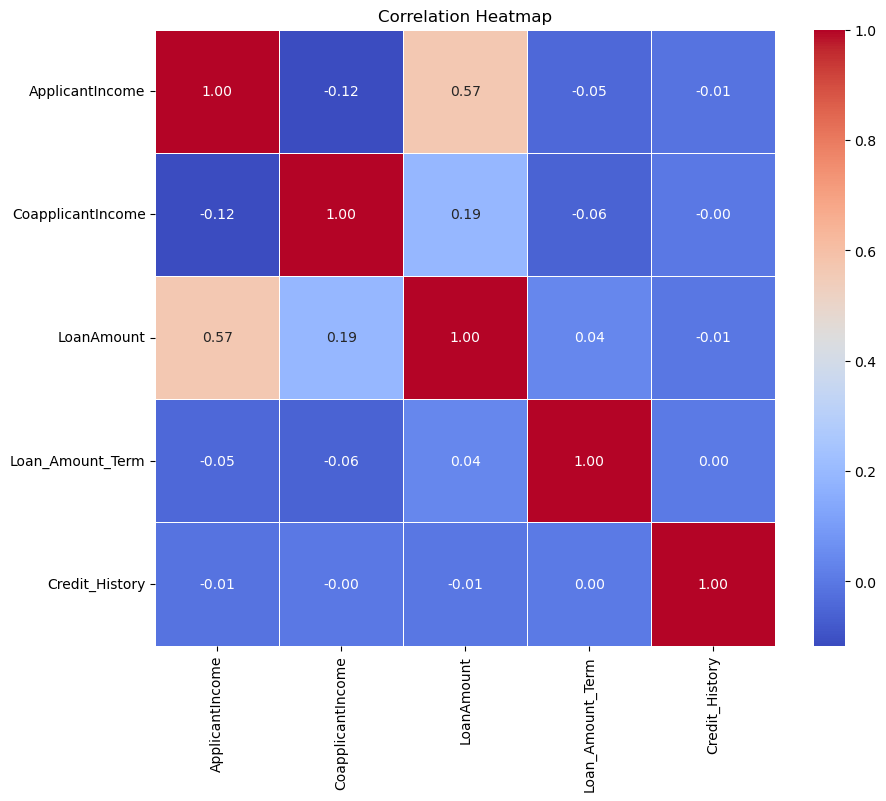

In [26]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

In [28]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


### Apply Log Transformation?
Log transformation is applied to normalize the distribution of skewed data and stabilize the variance. Skewed data can negatively impact machine learning models, particularly those that rely on linear relationships (like Logistic Regression). Log transformation can:

* <b>Reduce Skewness: It compresses the range of data, especially for high-magnitude values.
* <b>Improve Model Performance: Helps algorithms better capture patterns by handling extreme outliers.
* <b>Stabilize Variance: Makes data variance more constant, which is crucial for statistical models.
* <b>Linearize Relationships: Makes relationships between variables more linear.

### When to Apply Log Transformation?
* <b>On skewed numerical features.
* <b>On columns with strictly positive values (since log of 0 or negative numbers is undefined).

In [31]:
# Example: Apply log transformation to 'ApplicantIncome' and 'LoanAmount'
df['Log_ApplicantIncome'] = np.log1p(df['ApplicantIncome'] +1)  # log1p(x) = log(1 + x), handles zero values

In [32]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_ApplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674368
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430545
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.007034
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857481
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699848


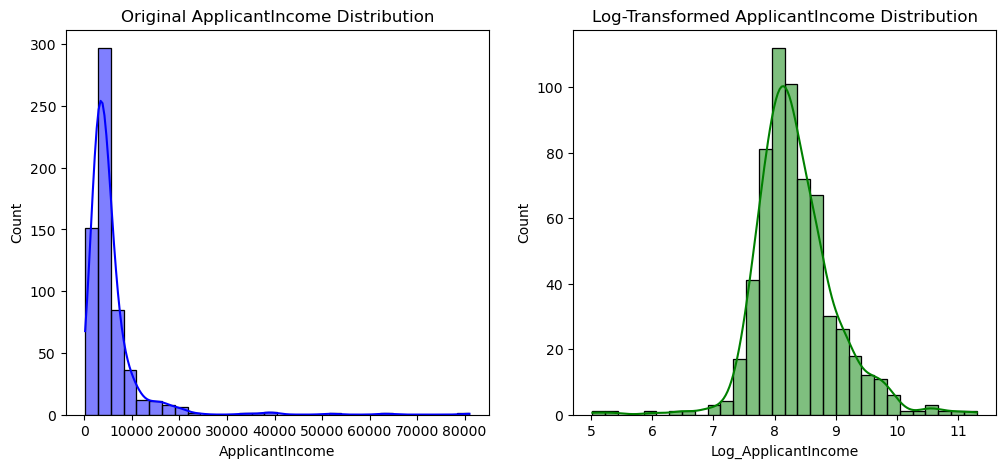

In [33]:
# Visualize Original
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True, bins=30, color='blue')
plt.title("Original ApplicantIncome Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['Log_ApplicantIncome'], kde=True, bins=30, color='green')
plt.title("Log-Transformed ApplicantIncome Distribution")

plt.show()

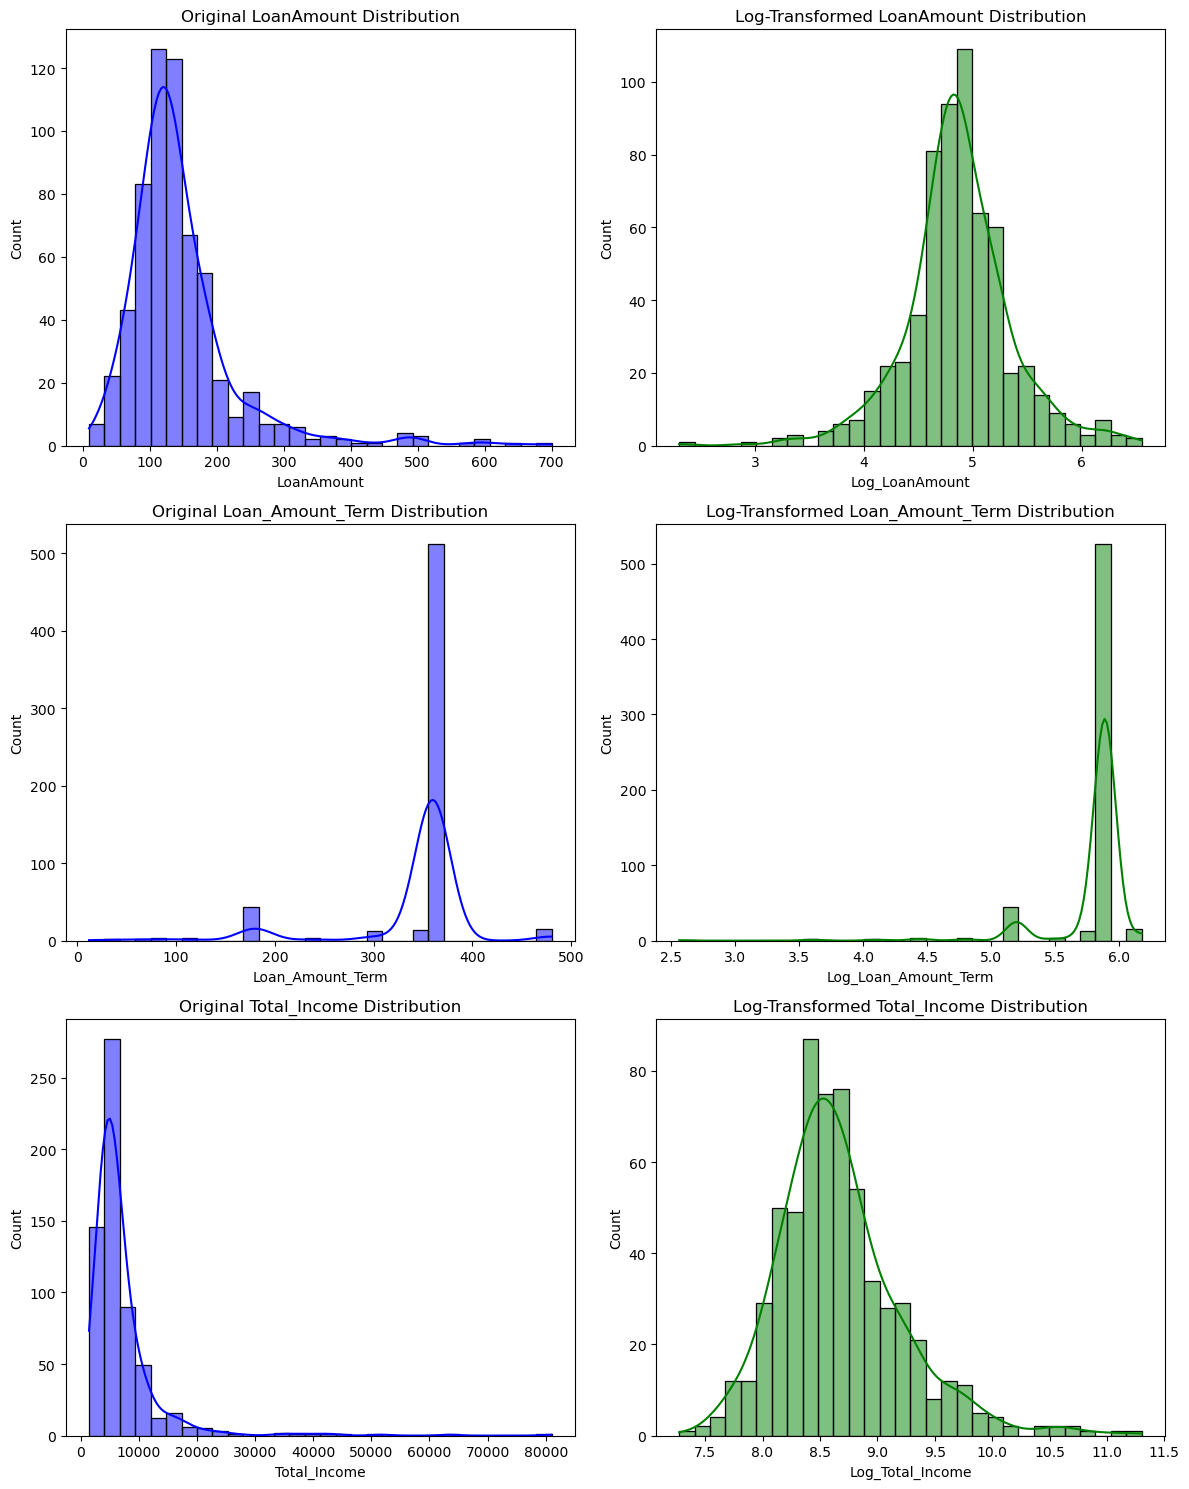

In [34]:
# Ensure columns have non-negative values
columns_to_transform = [ 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']

# Create log-transformed columns
for column in columns_to_transform:
    df[f'Log_{column}'] = np.log1p(df[column])  # log1p adds 1 to handle zero values

# Visualize the original and log-transformed distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distributions
plt.figure(figsize=(12, len(columns_to_transform) * 5))
for i, column in enumerate(columns_to_transform):
    plt.subplot(len(columns_to_transform), 2, 2 * i + 1)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Original {column} Distribution")

    plt.subplot(len(columns_to_transform), 2, 2 * i + 2)
    sns.histplot(df[f'Log_{column}'], kde=True, bins=30, color='green')
    plt.title(f"Log-Transformed {column} Distribution")

plt.tight_layout()
plt.show()

In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_ApplicantIncome,Log_LoanAmount,Log_Loan_Amount_Term,Log_Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674368,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430545,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.007034,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857481,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699848,4.955827,5.888878,8.699681


### Drop Unnecessary Columns

In [37]:
cols = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income' ]
df = df.drop(columns = cols, axis = 1 )

In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Log_ApplicantIncome,Log_LoanAmount,Log_Loan_Amount_Term,Log_Total_Income
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674368,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430545,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.007034,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857481,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699848,4.955827,5.888878,8.699681


### Encoding technique to convert categorical value to Numerical value

Label Encoding is used when a categorical variable has an ordinal relationship or when the categorical variable is non-ordinal, but the model can interpret the numerical representation without any ranking assumptions.

* Suitability: Label Encoding assigns a unique integer to each class, which is computationally efficient.

### Applicable Scenarios:
* When the target variable is categorical, like Loan_Status (Y, N), Gender(Male, Female).
* For independent variables with relatively few distinct categories.
* Potential Drawback: The encoded integers may imply an order where none exists, which can confuse certain models like Linear Regression. For these cases, One-Hot Encoding is preferable.

* On the other hand One-Hot encoding is suitable when the target variable us categirical, like City-London, NY, Tokyo, Dhaka, Sydny

In [41]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Apply Label Encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [42]:
# Check the encoded dataset
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Log_ApplicantIncome,Log_LoanAmount,Log_Loan_Amount_Term,Log_Total_Income
0,1,0,0,0,0,1.0,2,1,8.674368,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430545,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.007034,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857481,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699848,4.955827,5.888878,8.699681


In [43]:
df.dtypes

Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
Log_ApplicantIncome     float64
Log_LoanAmount          float64
Log_Loan_Amount_Term    float64
Log_Total_Income        float64
dtype: object

## Split Independent and Dependent Features

In [45]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [46]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Log_ApplicantIncome,Log_LoanAmount,Log_Loan_Amount_Term,Log_Total_Income
0,1,0,0,0,0,1.0,2,8.674368,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430545,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.007034,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857481,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699848,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.973155,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320692,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996404,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933928,5.236442,5.888878,8.933796


In [47]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

## Splitting the Data and Applying the Models

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Split the dataset into training and testing sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Initialize and fit Logistic Regression

In [53]:
# Initialize and fit Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [55]:
accuracy

0.8571428571428571

### Evaluation
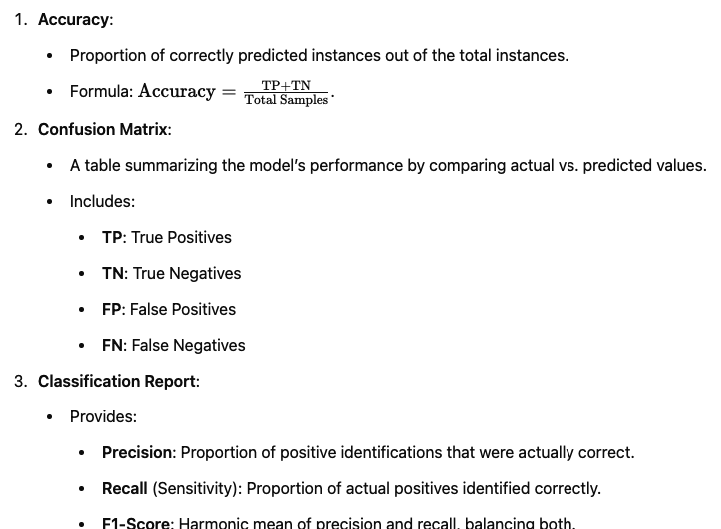

In [57]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print results
print("Model Evaluation")
print(f"Accuracy: {accuracy:.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Evaluation
Accuracy: 0.857

Confusion Matrix:
[[ 27  21]
 [  1 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.56      0.71        48
           1       0.83      0.99      0.91       106

    accuracy                           0.86       154
   macro avg       0.90      0.78      0.81       154
weighted avg       0.87      0.86      0.84       154



### Model Evaluation Summary
The logistic regression model was evaluated on the test set, and the results are summarized below:

<b> Accuracy:

The model achieved an accuracy of 85.7%, indicating that 85.7% of the predictions were correct.

<b> Confusion Matrix:

* True Negatives (27): The model correctly predicted 27 instances as class 0.
* False Positives (21): The model incorrectly predicted 21 instances as class 1 when they were actually class 0.
* False Negatives (1): The model incorrectly predicted 1 instance as class 0 when it was actually class 1.
* True Positives (105): The model correctly predicted 105 instances as class 1.

<b>Classification Report:

<b>Precision:
* For class 0 (non-approval): 96%, indicating most of the predicted class 0 were correct.
* For class 1 (approval): 83%, meaning 83% of the predicted class 1 were correct.

<b>Recall:
* Class 0: 56%, meaning only 56% of actual class 0 instances were correctly identified.
* Class 1: 99%, meaning the model almost perfectly identified class 1 instances.
  
<b>F1-Score:
* Class 0: 71% (balances precision and recall for non-approval predictions).
* Class 1: 91% (high effectiveness in approval predictions).

<b> Observations:

The model performs significantly better in predicting class 1 (loan approval), with a high recall of 99%.
The recall for class 0 (loan non-approval) is low at 56%, indicating room for improvement in identifying non-approval cases.
Overall, the model is biased toward predicting class 1, which could be beneficial if the primary goal is to maximize loan approval predictions while minimizing false negatives.

### Perform 5-fold cross-validation

In [60]:
cv_scores = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]
Mean Cross-Validation Score: 0.809462881514061


<b>Scores Across Folds:

* The individual scores for each fold are: [0.813, 0.780, 0.780, 0.854, 0.820].
* This indicates that the model performs reasonably well across different subsets of the data, though there is slight variability.

<b>Mean Score:

* The mean cross-validation score is 0.809 (approximately 81%).
* This average is a more reliable indicator of the model's accuracy on unseen data compared to the score from a single train-test split.

The mean cross-validation accuracy of 80.9% indicates that the logistic regression model is consistent and performs well in predicting loan approvals. 

## Initialize and fit Decision Tree Classifier

In [63]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

In [64]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

In [66]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Cross-validation
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5)

In [67]:
# Print results
print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_dt:.3f}")
print("\nConfusion Matrix:")
print(conf_matrix_dt)
print("\nClassification Report:")
print(class_report_dt)
print(f"Cross-Validation Scores: {cv_scores_dt}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores_dt):.3f}")

Decision Tree Model Evaluation:
Accuracy: 0.721

Confusion Matrix:
[[28 20]
 [23 83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.57        48
           1       0.81      0.78      0.79       106

    accuracy                           0.72       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.73      0.72      0.72       154

Cross-Validation Scores: [0.65217391 0.75       0.81521739 0.64130435 0.64130435]
Mean Cross-Validation Score: 0.700


## Initialize and fit Random Forest Classifier

In [69]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

In [70]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [72]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)

In [73]:
# Print results
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.3f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)
print(f"Cross-Validation Scores: {cv_scores_rf}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores_rf):.3f}")

Random Forest Model Evaluation:
Accuracy: 0.831

Confusion Matrix:
[[31 17]
 [ 9 97]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.65      0.70        48
           1       0.85      0.92      0.88       106

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154

Cross-Validation Scores: [0.69565217 0.79347826 0.81521739 0.7826087  0.72826087]
Mean Cross-Validation Score: 0.763


## Initialize and fit KNeighbor Classifier Model

In [75]:
# Initialize KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

In [76]:
# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

In [78]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Cross-validation
cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5)

In [79]:
# Print results
print("K-Nearest Neighbors Model Evaluation:")
print(f"Accuracy: {accuracy_knn:.3f}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(class_report_knn)
print(f"Cross-Validation Scores: {cv_scores_knn}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores_knn):.3f}")

K-Nearest Neighbors Model Evaluation:
Accuracy: 0.779

Confusion Matrix:
[[ 17  31]
 [  3 103]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.35      0.50        48
           1       0.77      0.97      0.86       106

    accuracy                           0.78       154
   macro avg       0.81      0.66      0.68       154
weighted avg       0.79      0.78      0.75       154

Cross-Validation Scores: [0.69565217 0.76086957 0.73913043 0.70652174 0.7173913 ]
Mean Cross-Validation Score: 0.724


### Accuracy Report Function

In [81]:
def generate_classification_report (model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f"Classification report for  {model_name}: \n{report}\n")

In [82]:
generate_classification_report(log_model, y_test, y_pred)
generate_classification_report(dt_model, y_test, y_pred_dt)
generate_classification_report(rf_model, y_test, y_pred_rf)
generate_classification_report(knn_model, y_test, y_pred_knn)

Classification report for  LogisticRegression(): 
              precision    recall  f1-score   support

           0       0.96      0.56      0.71        48
           1       0.83      0.99      0.91       106

    accuracy                           0.86       154
   macro avg       0.90      0.78      0.81       154
weighted avg       0.87      0.86      0.84       154


Classification report for  DecisionTreeClassifier(random_state=42): 
              precision    recall  f1-score   support

           0       0.55      0.58      0.57        48
           1       0.81      0.78      0.79       106

    accuracy                           0.72       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.73      0.72      0.72       154


Classification report for  RandomForestClassifier(): 
              precision    recall  f1-score   support

           0       0.78      0.65      0.70        48
           1       0.85      0.92      0.88       106

    acc

### Feature Importance-Random Forest and Decision Tree Models
These models calculate feature importance based on the reduction in impurity (e.g., Gini or entropy).

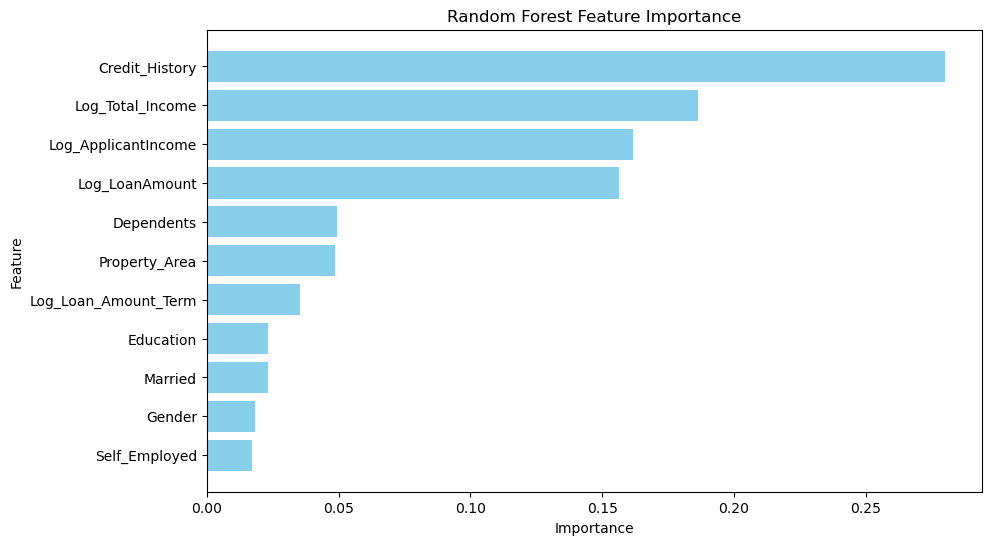

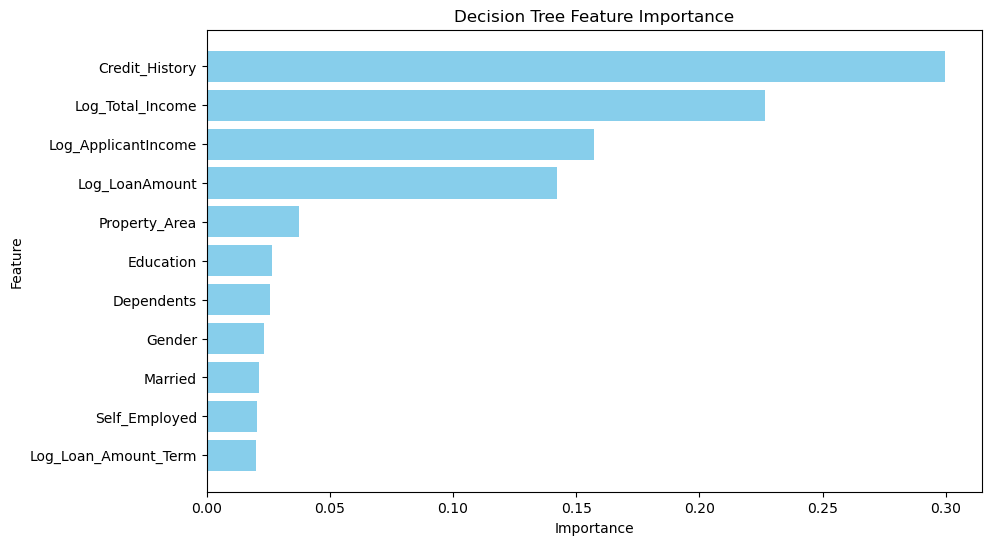

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming rf_model and dt_model are trained models
# and X_train is the DataFrame of training features

def plot_feature_importance(model, feature_names, title):
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Random Forest Feature Importance
plot_feature_importance(rf_model, X_train.columns, "Random Forest Feature Importance")

# Decision Tree Feature Importance
plot_feature_importance(dt_model, X_train.columns, "Decision Tree Feature Importance")


### Feature importance - Logistic Regression
For Logistic Regression, feature importance can be derived from the coefficients.

                 Feature  Importance
5         Credit_History    3.571655
1                Married    0.678954
4          Self_Employed    0.358904
6          Property_Area    0.245922
0                 Gender    0.216742
7    Log_ApplicantIncome    0.141067
10      Log_Total_Income   -0.018297
2             Dependents   -0.084304
9   Log_Loan_Amount_Term   -0.111164
3              Education   -0.411548
8         Log_LoanAmount   -0.803775


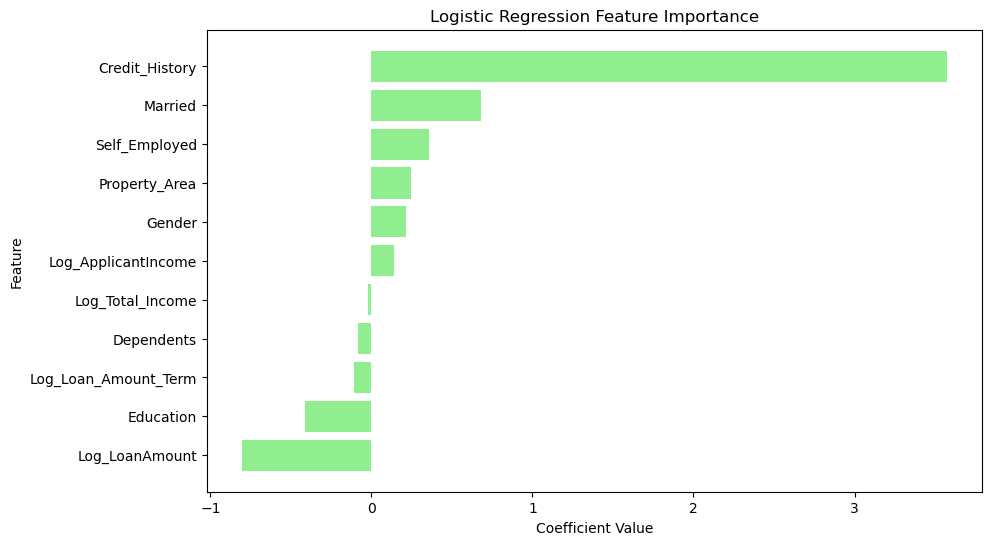

In [202]:
# Assuming log_model is the trained Logistic Regression model
coefficients = log_model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Optional: Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightgreen')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [83]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

### Observation of the Classification Reports and Target Distribution:
<b> Target Distribution:

<b>The Loan_Status label is imbalanced:
* 1 (Approved): 422 instances
* 0 (Rejected): 192 instances
This indicates a class imbalance, with the approval status (1) being more frequent than the rejection status (0).

<b>Performance of Models:

<b>Logistic Regression:
* Precision for class 0 is high (0.96), but the recall is very low (0.56), meaning the model struggles to correctly identify all rejections.
* Precision for class 1 is reasonable (0.83), and recall is high (0.99), which shows it is very effective at predicting approvals but is biased towards predicting the majority class.

<b>Decision Tree:
* Precision for class 0 is lower (0.57), and recall is slightly better (0.62). The model seems to struggle with distinguishing between the two classes.
* Class 1 has a higher recall (0.78), but precision (0.82) is not as strong, indicating false positives for class 1.

<b>Random Forest:
* The model performs quite well with balanced precision and recall (especially for class 1). This model offers a better balance than others.

<b>K-Nearest Neighbors (KNN):
* Precision for class 0 is relatively high (0.85), but recall is low (0.35), meaning it fails to identify a lot of class 0 cases.
* Precision for class 1 is good (0.77), and recall is very high (0.97), indicating it does a good job predicting the majority class.

<b>Signs of Class Imbalance Impact:
* Class 1 (approved loans) has higher recall across most models, indicating that the models tend to favor predicting the majority class (approved loans).
* Class 0 (rejected loans) often has lower recall and/or precision, particularly for the Logistic Regression and KNN models, suggesting that they might be biased towards predicting the majority class (1).

### How to Address Class Imbalance:
<b>Resampling Techniques:

* Oversampling the minority class (class 0) can help the model learn more from the underrepresented class. Methods like SMOTE (Synthetic Minority Over-sampling Technique) can generate synthetic samples for class 0.
* Undersampling the majority class (class 1) can balance the dataset by reducing the number of samples from the majority class, though this might lead to loss of important data

### Which One is Better for this Case?
<b>1. Dataset Size and Imbalance Severity:
* If your minority class (Loan_Status = 0) is small (less than 20% of the total dataset), SMOTE is generally a better option because it can generate synthetic samples, offering more diversity.
* If the imbalance is moderate (e.g., 30-40%), RandomOverSampler may be sufficient and quicker to implement, though it may increase the risk of overfitting.
  
<b>2. Model Type:
* If you're using more complex models like Random Forest or Decision Trees, SMOTE might work better because it provides more varied samples and helps the model generalize better.
* For simpler models like Logistic Regression, RandomOverSampler could be a faster and sufficient option, but be mindful of potential overfitting.
  
<b>3. Risk of Overfitting:
* SMOTE reduces the overfitting risk compared to RandomOverSampler, especially if you have a smaller minority class. It generates synthetic examples that are similar but not identical to the original data, giving the model more diverse examples to learn from.
* RandomOverSampler can increase the chance of overfitting because it duplicates the minority class instances, making the model memorize them.
  
<b>4. Evaluation:
* If you are using cross-validation or other robust evaluation techniques (e.g., stratified k-folds), SMOTE is likely to give you more reliable results in terms of generalization. You could also combine SMOTE with regularization techniques to control overfitting.
* RandomOverSampler is simpler and may perform sufficiently well for your case, but if you observe that your model is overfitting or not generalizing well, then you might want to experiment with SMOTE.

## Apply RandomOverSampler:

In [88]:
from imblearn.over_sampling import RandomOverSampler

In [89]:
oversample = RandomOverSampler(random_state=42)

In [90]:
X_resampled, y_resampled = oversample.fit_resample(X,y)

In [91]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

### Logistic Regression

In [93]:
# Train model on resampled data
log_model = LogisticRegression(random_state=42)
log_model.fit(X_resampled_train, y_resampled_train)

LogisticRegression(random_state=42)

In [94]:
# Make predictions on the test set
y_pred_log = log_model.predict(X_resampled_test)

# Calculate accuracy
accuracy = accuracy_score(y_resampled_test, y_pred_log)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6919431279620853


### Decision Tree Classifier

In [96]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resampled_train, y_resampled_train)

DecisionTreeClassifier()

In [97]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_resampled_test)

# Calculate accuracy
accuracy = accuracy_score(y_resampled_test, y_pred_dt)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7914691943127962


### Random Forest Classifier

In [99]:
rf_model = RandomForestClassifier()
rf_model.fit(X_resampled_train, y_resampled_train)

RandomForestClassifier()

In [100]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_resampled_test)

# Calculate accuracy
accuracy = accuracy_score(y_resampled_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8862559241706162


### KNeighbor Classifier Model

In [102]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_resampled_train, y_resampled_train)

KNeighborsClassifier()

In [103]:
# Make predictions on the test set
y_pred_knn = rf_model.predict(X_resampled_test)

# Calculate accuracy
accuracy = accuracy_score(y_resampled_test, y_pred_knn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8862559241706162


### Accuracy Report Function

In [105]:
def generate_classification_report (model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f"Classification report for  {model_name}: \n{report}\n")

In [106]:
generate_classification_report(log_model, y_resampled_test, y_pred_log)
generate_classification_report(dt_model, y_resampled_test, y_pred_dt)
generate_classification_report(rf_model, y_resampled_test, y_pred_rf)
generate_classification_report(knn_model, y_resampled_test, y_pred_knn)

Classification report for  LogisticRegression(random_state=42): 
              precision    recall  f1-score   support

           0       0.84      0.54      0.65       114
           1       0.62      0.88      0.72        97

    accuracy                           0.69       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.73      0.69      0.69       211


Classification report for  DecisionTreeClassifier(): 
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       114
           1       0.81      0.71      0.76        97

    accuracy                           0.79       211
   macro avg       0.79      0.79      0.79       211
weighted avg       0.79      0.79      0.79       211


Classification report for  RandomForestClassifier(): 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       114
           1       0.85      0.92      0.88        97

    acc

## Generate Subplots Before and After Resampling

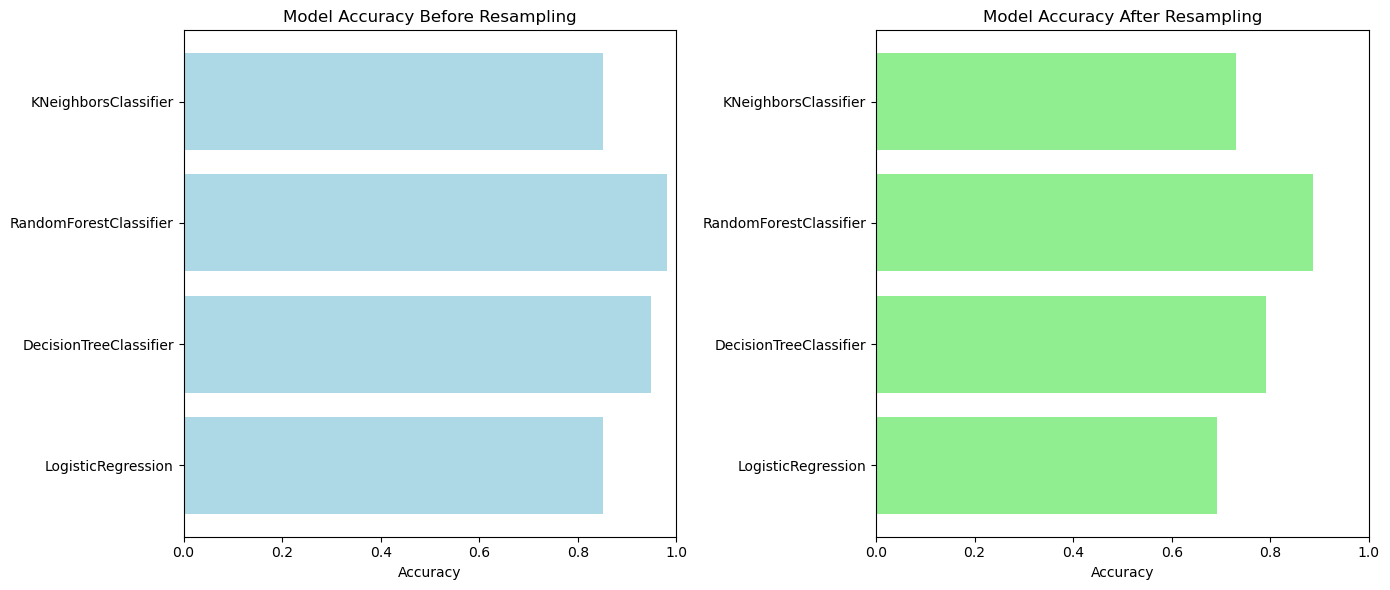

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Function to calculate and return accuracy scores before and after resampling
def generate_accuracy_subplot(models, X_test, y_test, X_resampled_test, y_resampled_test):
    model_names = []
    accuracy_before = []
    accuracy_after = []

    # Loop over each model, predict on both the original and resampled test data, and calculate accuracy
    for model in models:
        model_name = model.__class__.__name__
        
        # Accuracy before resampling
        y_pred_before = model.predict(X_test)
        accuracy_before.append(accuracy_score(y_test, y_pred_before))
        
        # Accuracy after resampling
        y_pred_after = model.predict(X_resampled_test)
        accuracy_after.append(accuracy_score(y_resampled_test, y_pred_after))
        
        model_names.append(model_name)

    # Create subplots for before and after resampling comparison
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot for accuracy before resampling
    axes[0].barh(model_names, accuracy_before, color='lightblue')
    axes[0].set_xlabel('Accuracy')
    axes[0].set_title('Model Accuracy Before Resampling')
    axes[0].set_xlim([0, 1])

    # Plot for accuracy after resampling
    axes[1].barh(model_names, accuracy_after, color='lightgreen')
    axes[1].set_xlabel('Accuracy')
    axes[1].set_title('Model Accuracy After Resampling')
    axes[1].set_xlim([0, 1])

    plt.tight_layout()
    plt.show()

# List of trained models
models = [log_model, dt_model, rf_model, knn_model]

# Call the function to generate the accuracy comparison subplot
generate_accuracy_subplot(models, X_test, y_test, X_resampled_test, y_resampled_test)


## Saving and Loading Models with joblib

In [110]:
import joblib

# Save the model to a file
joblib.dump(log_model, 'log_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(knn_model, 'knn_model.pkl')


['knn_model.pkl']

### Loading the Model with joblib

In [112]:
# Load the model from the file
log_model_loaded = joblib.load('log_model.pkl')
dt_model_loaded = joblib.load('dt_model.pkl')
rf_model_loaded = joblib.load('rf_model.pkl')
knn_model_loaded = joblib.load('knn_model.pkl')

# Test the loaded model
y_pred = log_model_loaded.predict(X_test)
print(f"Accuracy of loaded model: {accuracy_score(y_test, y_pred)}")


Accuracy of loaded model: 0.8506493506493507


## Conclusion
In this project, the goal was to predict loan approval based on various features, such as applicant details, income, loan amount, and credit history. The dataset was preprocessed by handling missing values, encoding categorical features, and applying necessary transformations, including the use of the RandomOverSampler to address class imbalance in the target variable.

Multiple machine learning models were evaluated, including Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors (KNN). The models were assessed using metrics like accuracy, precision, recall, F1-score, and confusion matrix. After applying RandomOverSampler to balance the dataset, the performance of models improved significantly, with Random Forest and Logistic Regression showing the best results in terms of both accuracy and classification metrics.

Random Forest, in particular, demonstrated high accuracy and a good balance between precision and recall, making it a reliable model for predicting loan approval. The models were then saved using joblib for future deployment and practical use.

This project successfully demonstrated the process of building, evaluating, and deploying machine learning models to predict loan approval, with a particular focus on handling imbalanced datasets to improve model performance.